# BRIEF FIN DE PARCOURS : La Roue des Emotions

## Import des Librairies Python

In [2]:
import pandas as pd
import numpy as np 
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import re
import string
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from wordcloud import WordCloud
import os
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

## Import du DataSet 

In [2]:
pd.set_option('display.max_colwidth',100)

data = pd.read_csv("Emotion_final.csv")


stopwords = nltk.corpus.stopwords.words('english')
# stopwords.append('feel')
# stopwords.append('feeling')


## Visualisation des données Brutes

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [4]:
data.head()

Text  \
0                                                                              i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned hopeful just from being around someone who cares ...   
2                                                     im grabbing a minute to post i feel greedy wrong   
3         i am ever feeling nostalgic about the fireplace i will know that it is still on the property   
4                                                                                 i am feeling grouchy   

   Emotion  
0  sadness  
1  sadness  
2    anger  
3     love  
4    anger

In [9]:
import plotly.express as px
import pandas as pd

px.histogram(data, "Emotion", color="Emotion")

19070
(21459, 19070)


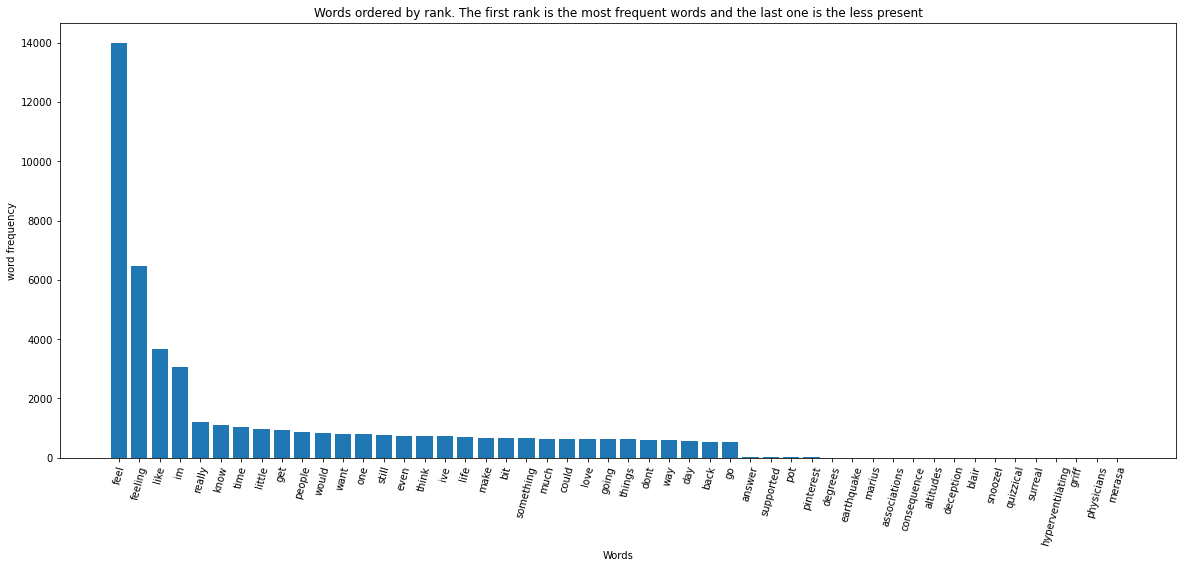

In [10]:
    corpus = data['Text']
    targets = data['Emotion']
    vect = CountVectorizer(stop_words = stopwords)
    X = vect.fit_transform(corpus)
    words = vect.get_feature_names()
    print(len(words))
    print(X.shape)

    wsum = np.array(X.sum(0))[0]
    ix = wsum.argsort()[::-1]
    wrank = wsum[ix] 
    labels = [words[i] for i in ix]

    def subsample(x, step=1000):
        return np.hstack((x[:30], x[30::step]))

    plt.figure(figsize=(20,8))
    freq = subsample(wrank)
    r = np.arange(len(freq))
    plt.bar(r, freq, width=0.8)
    plt.xticks(r, subsample(labels), rotation=75)
    plt.xlabel('Words')
    plt.ylabel('word frequency')
    plt.title("Words ordered by rank. The first rank is the most frequent words and the last one is the less present");

In [11]:
x = subsample(labels)
y = freq
trace = go.Bar(
                x = x,
                y = y,
                name = "Words ordered by rank. The first rank is the most frequent words and the last one is the less present",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)))
               

layout = go.Layout(barmode = "group")
fig = go.Figure(data = trace, layout = layout)
fig.show()

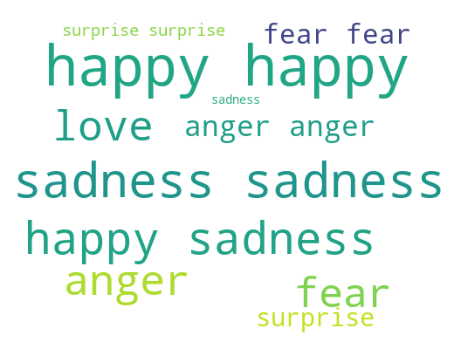

In [12]:
x = np.hstack(targets)

plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

# Nettoyage des données

In [9]:
def clean_text(textC):
    result = "".join([word for word in textC if word not in string.punctuation])
    tokens = re.split('\W+', result)
    text = [word for word in tokens if word not in stopwords]
    return text

data['Text_NO_Stopwords']= data['Text'].apply(lambda x: clean_text(x.lower()))

data.head()

Text  \
0                                                                              i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned hopeful just from being around someone who cares ...   
2                                                     im grabbing a minute to post i feel greedy wrong   
3         i am ever feeling nostalgic about the fireplace i will know that it is still on the property   
4                                                                                 i am feeling grouchy   

   Emotion  \
0  sadness   
1  sadness   
2    anger   
3     love   
4    anger   

                                                         Text_NO_Stopwords  
0                                                [didnt, feel, humiliated]  
1  [go, feeling, hopeless, damned, hopeful, around, someone, cares, awake]  
2                        [im, grabbing, minute, post, feel, greedy, wrong]  
3             [ever, feeling, nostalgic, fireplace, know, still, property]  
4                                                       [feeling, grouchy]

# Réduction de la taille d'un document à l'aide du stemming 

In [10]:
def stemming(words):
    result = [ps.stem(word)for word in words]
    return result

data['Text_Stemmed'] = data ['Text_NO_Stopwords'].apply(lambda x : stemming(x))
data.head()

Text  \
0                                                                              i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned hopeful just from being around someone who cares ...   
2                                                     im grabbing a minute to post i feel greedy wrong   
3         i am ever feeling nostalgic about the fireplace i will know that it is still on the property   
4                                                                                 i am feeling grouchy   

   Emotion  \
0  sadness   
1  sadness   
2    anger   
3     love   
4    anger   

                                                         Text_NO_Stopwords  \
0                                                [didnt, feel, humiliated]   
1  [go, feeling, hopeless, damned, hopeful, around, someone, cares, awake]   
2                        [im, grabbing, minute, post, feel, greedy, wrong]   
3             [ever, feeling, nostalgic, fireplace, know, still, property]   
4                                                       [feeling, grouchy]   

                                                   Text_Stemmed  
0                                         [didnt, feel, humili]  
1  [go, feel, hopeless, damn, hope, around, someon, care, awak]  
2                  [im, grab, minut, post, feel, greedi, wrong]  
3        [ever, feel, nostalg, fireplac, know, still, properti]  
4                                               [feel, grouchi]

l'inconvenient du stemming est que cette méthode peut engendrer des mots qui n'ont aucun sens mais est rapide d'éxécution

# Réduction de la taille d'un document à l'aide de la lemmatisation

In [11]:
from nltk import wordnet

def lemmatizing(words):
    result = [wn.lemmatize(word)for word in words]
    return result

data['Text_lem'] = data ['Text_NO_Stopwords'].apply(lambda x : lemmatizing(x))
data.head(-10)

Text  \
0                                                                                  i didnt feel humiliated   
1      i can go from feeling so hopeless to so damned hopeful just from being around someone who cares ...   
2                                                         im grabbing a minute to post i feel greedy wrong   
3             i am ever feeling nostalgic about the fireplace i will know that it is still on the property   
4                                                                                     i am feeling grouchy   
...                                                                                                    ...   
21444  Effortlessly , his knee slid to part her legs , but when she threw him a look of utter dismay he...   
21445  The commercial ethic meant some deterioration in standards , while the cutbacks in the Overseas ...   
21446                                     This caused a good deal of consternation and dismay in Westminst   
21447  And it was equally insistent that a policy of retreat would cause dismay in Washington , thereby...   
21448                                        Floyd Patterson has expressed dismay over the current treatme   

       Emotion  \
0      sadness   
1      sadness   
2        anger   
3         love   
4        anger   
...        ...   
21444     fear   
21445     fear   
21446     fear   
21447     fear   
21448     fear   

                                                                                         Text_NO_Stopwords  \
0                                                                                [didnt, feel, humiliated]   
1                                  [go, feeling, hopeless, damned, hopeful, around, someone, cares, awake]   
2                                                        [im, grabbing, minute, post, feel, greedy, wrong]   
3                                             [ever, feeling, nostalgic, fireplace, know, still, property]   
4                                                                                       [feeling, grouchy]   
...                                                                                                    ...   
21444                             [effortlessly, knee, slid, part, legs, threw, look, utter, dismay, paus]   
21445  [commercial, ethic, meant, deterioration, standards, cutbacks, overseas, news, department, one, ...   
21446                                               [caused, good, deal, consternation, dismay, westminst]   
21447  [equally, insistent, policy, retreat, would, cause, dismay, washington, thereby, diminishing, br...   
21448                                              [floyd, patterson, expressed, dismay, current, treatme]   

                                                                                              Text_Stemmed  \
0                                                                                    [didnt, feel, humili]   
1                                             [go, feel, hopeless, damn, hope, around, someon, care, awak]   
2                                                             [im, grab, minut, post, feel, greedi, wrong]   
3                                                   [ever, feel, nostalg, fireplac, know, still, properti]   
4                                                                                          [feel, grouchi]   
...                                                                                                    ...   
21444                               [effortlessli, knee, slid, part, leg, threw, look, utter, dismay, pau]   
21445  [commerci, ethic, meant, deterior, standard, cutback, oversea, news, depart, one, glori, bush, h...   
21446                                                      [caus, good, deal, constern, dismay, westminst]   
21447  [equal, insist, polici, retreat, would, caus, dismay, washington, therebi, diminish, britain, ab...   
21448                            

La méthode de réduction de texte par lemmatisation prend en compte le contexte dans lequel le mot est, la lemmatisation propose toujours des mots ayant un sens, par contre l'inconvenient est que celui prend plus de temps.

Dans le cas de notre étude, nous allons faire une étude sur le sens des mots, la méthode de lemmatisation me semble la plus opportune dans notre cas, nous allons donc continuer avec la lemmatisation

# Vectorisation (transformation du texte sous forme de chiffres) du Text:

## Vectorisation avec CountVectorizer (nb d'occurences des mots)

In [12]:
pd.set_option('display.max_colwidth',100)

data = pd.read_csv("Emotion_final.csv")

stopwords = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()

data.head()

Text  \
0                                                                              i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned hopeful just from being around someone who cares ...   
2                                                     im grabbing a minute to post i feel greedy wrong   
3         i am ever feeling nostalgic about the fireplace i will know that it is still on the property   
4                                                                                 i am feeling grouchy   

   Emotion  
0  sadness  
1  sadness  
2    anger  
3     love  
4    anger

In [13]:
def clean_email(email):
    result = "".join([word for word in email if word not in string.punctuation])
    tokens = re.split('\W+',result)
    text =[wn.lemmatize(word)for word in tokens if word not in stopwords]
    return text


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorisation_full = CountVectorizer(analyzer=clean_email)
vect_final = vectorisation_full.fit_transform(data['Text'])
print (vect_final.shape)

(21459, 17873)


In [15]:
print(vectorisation_full.get_feature_names())

['', '10', '11', '1295', '13', '15', '15yearold', '1878', '18years', '19', '191523', '1917', '1926', '1929', '1974', '1975', '1978', '1980', '1980s', '1984', '1986', '1987', '1989', '1991', '1992', '199394', '19th', '2', '200000', '20th', '21', '23monthold', '23r', '24', '30', '32', '33', '34', '35', '37574', '4', '40000', '403', '40th', '46', '48', '5', '50', '500', '55', '70', '75th', '82ndminute', '9th', 'A', 'AFRICA', 'ALD', 'ASLEF', 'Aaron', 'Abd', 'Abigail', 'About', 'According', 'Accordingly', 'Accountants', 'Adam', 'Admiral', 'Africans', 'After', 'Afterwards', 'Aggie', 'Agnes', 'Ah', 'Ahmed', 'Alain', 'Albert', 'Aldridge', 'Alex', 'Alexandra', 'Alexei', 'Alfed', 'Alic', 'Alice', 'All', 'Allan', 'Allen', 'Almost', 'Also', 'Although', 'Always', 'America', 'American', 'Amid', 'An', 'Ana', 'And', 'Andrew', 'Andrus', 'Angalo', 'Ann', 'Anna', 'Annabel', 'Anne', 'Annie', 'Another', 'Anthony', 'Anxious', 'Anyone', 'Aplin', 'Apparently', 'Applause', 'April', 'Araminta', 'Archbishop', 'A

In [16]:
data0 = data [0:10]

vectorisation_0 = CountVectorizer(analyzer=clean_email)
vect_final0 = vectorisation_0.fit_transform(data0['Text'])
print (vect_final0.shape)

(10, 57)


In [17]:
print(vectorisation_0.get_feature_names())

['also', 'amount', 'around', 'asleep', 'awake', 'burdened', 'care', 'confused', 'damned', 'didnt', 'ever', 'fallen', 'faster', 'feel', 'feeling', 'fireplace', 'funny', 'go', 'grabbing', 'greedy', 'grouchy', 'hopeful', 'hopeless', 'huge', 'humiliated', 'im', 'ive', 'jaded', 'know', 'lately', 'life', 'like', 'little', 'lot', 'made', 'man', 'milligram', 'minute', 'nostalgic', 'old', 'performed', 'petronas', 'post', 'profit', 'property', 'recommended', 'romantic', 'someone', 'still', 'sure', 'taking', 'teenager', 'time', 'wasnt', 'well', 'wrong', 'year']


In [18]:
vect_final0

<10x57 sparse matrix of type '<class 'numpy.int64'>'
	with 67 stored elements in Compressed Sparse Row format>

In [19]:
df_vect_final0 = pd.DataFrame(vect_final0.toarray())
df_vect_final0

0   1   2   3   4   5   6   7   8   9   ...  47  48  49  50  51  52  53  \
0   0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   0   
1   0   0   1   0   1   0   1   0   1   0  ...   1   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0  ...   0   1   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
5   0   0   0   0   0   1   0   0   0   0  ...   0   0   1   0   0   0   1   
6   1   1   0   1   0   0   0   0   0   0  ...   0   0   0   1   0   1   0   
7   0   0   0   0   0   0   0   1   0   0  ...   0   0   0   0   1   0   0   
8   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
9   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

   54  55  56  
0   0   0   0  
1   0   0   0  
2   0   1   0  
3   0   0   0  
4   0   0   0  
5   0   0   0  
6   0   0   0  
7   0   0   1  
8   1   0   1  
9   0   0   0  

[10 rows x 57 columns]

## Vectorisation avec la technique NGram 

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vectorisation = CountVectorizer(ngram_range=(2,2))
vect_final = ngram_vectorisation.fit_transform(data['Text'])
print(vect_final.shape)

(21459, 141469)


In [21]:
print(ngram_vectorisation.get_feature_names())

['000 ecstatic', '10 and', '10 awry', '11 april', '11 downing', '12 95', '13 put', '15 and', '15 was', '15 year', '18 years', '1878 deaf', '1915 23', '1917 and', '1926 when', '1929 where', '1974 submiss', '1975 and', '1978 has', '1978 we', '1980 she', '1980s has', '1984 at', '1986 irate', '1987 to', '1989 he', '1991 alone', '1991 which', '1992 as', '1993 94', '1997 basic', '19th century', '200 000', '20th goal', '21 he', '23 month', '24 hours', '30 years', '32 was', '33 midwife', '34 pages', '40 000', '40 he', '40th birthday', '46 makes', '48 hours', '50 ti', '55 of', '70 per', '75th anniversary', '82nd minute', '94 squad', '95 spans', '9th october', 'aa full', 'aa meeting', 'aaaaand tis', 'aaaand after', 'aac or', 'aahhh work', 'aaron copland', 'aaron has', 'abandon any', 'abandon it', 'abandon me', 'abandon the', 'abandoned and', 'abandoned ask', 'abandoned believe', 'abandoned by', 'abandoned feel', 'abandoned for', 'abandoned little', 'abandoned plate', 'abandoned someone', 'abando

In [22]:
data0 =data[0:5]

ngram_vectorisation0 = CountVectorizer(ngram_range=(2,2))
vect_final0 = ngram_vectorisation0.fit_transform(data0['Text'])
print(vect_final0.shape)

(5, 45)


In [23]:
print(ngram_vectorisation0.get_feature_names())

['about the', 'am ever', 'am feeling', 'and is', 'around someone', 'being around', 'can go', 'cares and', 'damned hopeful', 'didnt feel', 'ever feeling', 'feel greedy', 'feel humiliated', 'feeling grouchy', 'feeling nostalgic', 'feeling so', 'fireplace will', 'from being', 'from feeling', 'go from', 'grabbing minute', 'greedy wrong', 'hopeful just', 'hopeless to', 'im grabbing', 'is awake', 'is still', 'it is', 'just from', 'know that', 'minute to', 'nostalgic about', 'on the', 'post feel', 'so damned', 'so hopeless', 'someone who', 'still on', 'that it', 'the fireplace', 'the property', 'to post', 'to so', 'who cares', 'will know']


In [24]:
vect_final0

<5x45 sparse matrix of type '<class 'numpy.int64'>'
	with 45 stored elements in Compressed Sparse Row format>

In [25]:
df_vect_final0 = pd.DataFrame(vect_final0.toarray())
df_vect_final0

0   1   2   3   4   5   6   7   8   9   ...  35  36  37  38  39  40  41  \
0   0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   0   
1   0   0   0   1   1   1   1   1   1   0  ...   1   1   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   1   
3   1   1   0   0   0   0   0   0   0   0  ...   0   0   1   1   1   1   0   
4   0   0   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

   42  43  44  
0   0   0   0  
1   1   1   0  
2   0   0   0  
3   0   0   1  
4   0   0   0  

[5 rows x 45 columns]

## Vectorisation avec la technique TF-IDF(Poid du mot dans le texte)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorisation = TfidfVectorizer(analyzer=clean_email)
tfidf_final = tfidf_vectorisation.fit_transform(data['Text'])
print(tfidf_final.shape)

(21459, 17873)


In [27]:
print(tfidf_vectorisation.get_feature_names())

['', '10', '11', '1295', '13', '15', '15yearold', '1878', '18years', '19', '191523', '1917', '1926', '1929', '1974', '1975', '1978', '1980', '1980s', '1984', '1986', '1987', '1989', '1991', '1992', '199394', '19th', '2', '200000', '20th', '21', '23monthold', '23r', '24', '30', '32', '33', '34', '35', '37574', '4', '40000', '403', '40th', '46', '48', '5', '50', '500', '55', '70', '75th', '82ndminute', '9th', 'A', 'AFRICA', 'ALD', 'ASLEF', 'Aaron', 'Abd', 'Abigail', 'About', 'According', 'Accordingly', 'Accountants', 'Adam', 'Admiral', 'Africans', 'After', 'Afterwards', 'Aggie', 'Agnes', 'Ah', 'Ahmed', 'Alain', 'Albert', 'Aldridge', 'Alex', 'Alexandra', 'Alexei', 'Alfed', 'Alic', 'Alice', 'All', 'Allan', 'Allen', 'Almost', 'Also', 'Although', 'Always', 'America', 'American', 'Amid', 'An', 'Ana', 'And', 'Andrew', 'Andrus', 'Angalo', 'Ann', 'Anna', 'Annabel', 'Anne', 'Annie', 'Another', 'Anthony', 'Anxious', 'Anyone', 'Aplin', 'Apparently', 'Applause', 'April', 'Araminta', 'Archbishop', 'A

In [28]:
data0 = data[0:5]
tfidf_vectorisation0 = TfidfVectorizer(analyzer=clean_email)
tfidf_final0 = tfidf_vectorisation0.fit_transform(data0['Text'])
print(tfidf_final0.shape)


(5, 25)


In [29]:
print(tfidf_vectorisation0.get_feature_names())

['around', 'awake', 'care', 'damned', 'didnt', 'ever', 'feel', 'feeling', 'fireplace', 'go', 'grabbing', 'greedy', 'grouchy', 'hopeful', 'hopeless', 'humiliated', 'im', 'know', 'minute', 'nostalgic', 'post', 'property', 'someone', 'still', 'wrong']


In [30]:
tfidf_final0

<5x25 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Row format>

In [31]:
df_tfidf_final0 = pd.DataFrame(tfidf_final0.toarray())
df_tfidf_final0.columns = tfidf_vectorisation0.get_feature_names()
df_tfidf_final0

around     awake      care    damned     didnt      ever      feel  \
0  0.000000  0.000000  0.000000  0.000000  0.614189  0.000000  0.495524   
1  0.344041  0.344041  0.344041  0.344041  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.312840   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.393795  0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

    feeling  fireplace        go  ...  humiliated        im      know  \
0  0.000000   0.000000  0.000000  ...    0.614189  0.000000  0.000000   
1  0.230408   0.000000  0.344041  ...    0.000000  0.000000  0.000000   
2  0.000000   0.000000  0.000000  ...    0.000000  0.387757  0.000000   
3  0.263729   0.393795  0.000000  ...    0.000000  0.000000  0.393795   
4  0.556451   0.000000  0.000000  ...    0.000000  0.000000  0.000000   

     minute  nostalgic      post  property   someone     still     wrong  
0  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1  0.000000   0.000000  0.000000  0.000000  0.344041  0.000000  0.000000  
2  0.387757   0.000000  0.387757  0.000000  0.000000  0.000000  0.387757  
3  0.000000   0.393795  0.000000  0.393795  0.000000  0.393795  0.000000  
4  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

[5 rows x 25 columns]

## Utilisation de la méthode de Feature engineering 

In [13]:
pd.set_option('display.max_colwidth',100)

data = pd.read_csv("Emotion_final.csv")

stopwords = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()

data.head()

Text  \
0                                                                              i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned hopeful just from being around someone who cares ...   
2                                                     im grabbing a minute to post i feel greedy wrong   
3         i am ever feeling nostalgic about the fireplace i will know that it is still on the property   
4                                                                                 i am feeling grouchy   

   Emotion  
0  sadness  
1  sadness  
2    anger  
3     love  
4    anger

In [14]:
data['Text_len']= data['Text'].apply( lambda x : len(x)- x.count(" "))
data.head(30)

Text  \
0                                                                               i didnt feel humiliated   
1   i can go from feeling so hopeless to so damned hopeful just from being around someone who cares ...   
2                                                      im grabbing a minute to post i feel greedy wrong   
3          i am ever feeling nostalgic about the fireplace i will know that it is still on the property   
4                                                                                  i am feeling grouchy   
5                                     ive been feeling a little burdened lately wasnt sure why that was   
6   ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but...   
7                             i feel as confused about life as a teenager or as jaded as a year old man   
8    i have been with petronas for years i feel that petronas has performed well and made a huge profit   
9                                                                                   i feel romantic too   
10                                   i feel like i have to make the suffering i m seeing mean something   
11  i do feel that running is a divine experience and that i can expect to have some type of spiritu...   
12                                           i think it s the easiest time of year to feel dissatisfied   
13                                                                   i feel low energy i m just thirsty   
14  i have immense sympathy with the general point but as a possible proto writer trying to find tim...   
15                                                      i do not feel reassured anxiety is on each side   
16                                                                 i didnt really feel that embarrassed   
17                                                              i feel pretty pathetic most of the time   
18  i started feeling sentimental about dolls i had as a child and so began a collection of vintage ...   
19                     i now feel compromised and skeptical of the value of every unit of work i put in   
20                       i feel irritated and rejected without anyone doing anything or saying anything   
21  i am feeling completely overwhelmed i have two strategies that help me to feel grounded pour my ...   
22                                                      i have the feeling she was amused and delighted   
23  i was able to help chai lifeline with your support and encouragement is a great feeling and i am...   
24              i already feel like i fucked up though because i dont usually eat at all in the morning   
25  i still love my so and wish the best for him i can no longer tolerate the effect that bm has on ...   
26               i feel so inhibited in someone elses kitchen like im painting on someone elses picture   
27                                                               i become overwhelmed and feel defeated   
28  i feel kinda appalled that she feels like she needs to explain in wide and lenghth her body meas...   
29                                                  i feel more superior dead chicken or grieving child   

     Emotion  Text_len  
0    sadness        20  
1    sadness        88  
2      anger        39  
3       love        75  
4      anger        17  
5    sadness        54  
6   surprise       100  
7       fear        57  
8      happy        80  
9       love        16  
10   sadness        53  
11     happy        88  
12     anger        47  
13   sadness        27  
14     happy       178  
15     happy        38  
16   sadness        31  
17   sadness        32  
18   sadness       103  
19      fear        64  
20     anger        67  
21      fear       170  
22     happy        39  
23     happy       103  
24     anger        70  
25   sadness       206  
26   sadness        72  
27   sadness        33  
28     anger        87  
29     happy        43

In [15]:
def count_punctuation(text):
    binary_array = [1 for ch in text if ch in string.punctuation]
    nb_ponctuation = sum(binary_array)
    total = len(text)-text.count(" ")
    return round(nb_ponctuation/total, 4)*100

In [16]:
data['punctuation_rate']=data['Text'].apply(lambda x: count_punctuation(x))

data.head()

Text  \
0                                                                              i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned hopeful just from being around someone who cares ...   
2                                                     im grabbing a minute to post i feel greedy wrong   
3         i am ever feeling nostalgic about the fireplace i will know that it is still on the property   
4                                                                                 i am feeling grouchy   

   Emotion  Text_len  punctuation_rate  
0  sadness        20               0.0  
1  sadness        88               0.0  
2    anger        39               0.0  
3     love        75               0.0  
4    anger        17               0.0

In [17]:
timesData = data
timesData.head()

Text  \
0                                                                              i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned hopeful just from being around someone who cares ...   
2                                                     im grabbing a minute to post i feel greedy wrong   
3         i am ever feeling nostalgic about the fireplace i will know that it is still on the property   
4                                                                                 i am feeling grouchy   

   Emotion  Text_len  punctuation_rate  
0  sadness        20               0.0  
1  sadness        88               0.0  
2    anger        39               0.0  
3     love        75               0.0  
4    anger        17               0.0

In [18]:
px.scatter(timesData,x="Text_len",y="Emotion" )


Le nombre de caractères n'est pas déterminant dans la classification des sentiments

In [19]:
dfValue = timesData
dfValue.punctuation_rate = pd.to_numeric(dfValue.punctuation_rate, errors='coerce')

grouped = dfValue.groupby('Emotion')
y=grouped['punctuation_rate'].agg(np.mean).sort_values(ascending=False)

print (y)
print ("______")
print (y.index.get_level_values(0).tolist())
print ("______")

trace = go.Bar(
                x = y.index.get_level_values(0).tolist(),
                y = y,
                name = "Taux de ponctuation en fonction des sentiments",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)),
                text = y.index.get_level_values(0).tolist())

layout = go.Layout(barmode = "group")
fig = go.Figure(data = trace, layout = layout)
iplot(fig)


Emotion
surprise    0.350466
anger       0.241046
fear        0.185845
sadness     0.158155
happy       0.084965
love        0.000000
Name: punctuation_rate, dtype: float64
______
['surprise', 'anger', 'fear', 'sadness', 'happy', 'love']
______


In [20]:
px.sunburst(timesData, path=["Emotion"],color="punctuation_rate",
          hover_data=timesData.columns)

Le taux de ponctuation peut être déterminant dans la classification des sentiments, on voit ici que le taux pour la surprise est supérieur à 25% pour exemple.

## Création de Pipeline pour entraîner le jeu de donnée et tester les différents classifieurs

In [ ]:
from time import time
from collections import defaultdict
import plotly.graph_objs as go

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import SGDClassifier, LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, ComplementNB, BernoulliNB
from sklearn.decomposition import FastICA, KernelPCA, TruncatedSVD, SparsePCA, NMF, FactorAnalysis, LatentDirichletAllocation

from sklearn.neural_network import MLPClassifier

import nltk


In [ ]:
# pipe0 = Pipeline([
#     ('vect', CountVectorizer()),
#     ('sgd', SGDClassifier(class_weight = 'balanced')),
# ])
# pipe1 = Pipeline([
#     ('vect', CountVectorizer()),
#     ('svm', LinearSVC(max_iter= 3000)),
# ])
# pipe2 = Pipeline([
#     ('vect', CountVectorizer()),
#     ('MLPC', MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 6), max_iter = 10000)),
# ])
# pipe3 = Pipeline([
#     ('vect', CountVectorizer()),
#     ('logit', LogisticRegression(max_iter= 3000)),
# ])
# pipe4 = Pipeline([
#     ('vect', CountVectorizer()),
#     ('tfidf', TfidfTransformer()),
#     ('logit1', LogisticRegression(max_iter= 3000)),
# ])
# def run_pipes(pipes, splits, test_size=0.2, seed=42):
#     res = defaultdict(list)
#     spliter = ShuffleSplit(n_splits=splits, test_size=test_size, random_state=seed) #mélange
#     for idx_train, idx_test in spliter.split(corpus): #
#         for pipe in pipes:
#             # name of the model
#             name = "-".join([x[0] for x in pipe.steps])

#             # extract datasets
#             X_train = corpus[idx_train]
#             X_test = corpus[idx_test]
#             y_train = targets[idx_train]
#             y_test = targets[idx_test]

#             # Learn
#             start = time()
#             pipe.fit(X_train, y_train)
#             fit_time = time() - start

#             # predict and save results
#             y = pipe.predict(X_test)
#             res[name].append([
#                 fit_time,
#                 #f1_score(y_test, y, pos_label=1,average='weighted'),   #average setting, one of [None, 'micro', 'macro', 'weighted'].
#                 f1_score(y_test, y, average='weighted'),
#                 f1_score(y_test, y, average= 'macro')

#                 #f1_score(y_test, y, pos_label=0),
#             ])
#     return res

In [ ]:
# res = run_pipes([pipe1, pipe0, pipe3, pipe4], splits=1)

In [ ]:
def print_table(res):
    # Compute mean and std
    final = {}
    for model in res:
        arr = np.array(res[model])
        final[model] = {
            "time" : arr[:, 0].mean().round(2),
            "f1_weighted": [arr[:,1].mean().round(3), arr[:,1].std().round(3)],
            "f1_macro": [arr[:,2].mean().round(3), arr[:,2].std().round(3)]
        }

    df = pd.DataFrame.from_dict(final, orient="index").round(3)
    return df

In [ ]:
# print_table(res)

Le classifieur le plus efficace est dans ce cas de figure SGD avec une  une efficacité de 89% et seulement 1.95 secondes .

# DATA VIZ

In [52]:
from time import time
from collections import defaultdict
import plotly.graph_objs as go

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import SGDClassifier, LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, ComplementNB, BernoulliNB
from sklearn.decomposition import FastICA, KernelPCA, TruncatedSVD, SparsePCA, NMF, FactorAnalysis, LatentDirichletAllocation

from sklearn.neural_network import MLPClassifier

import nltk

In [53]:
# GLOBAL VARIABLES

pd.set_option('display.max_colwidth',100)

data = pd.read_csv("Emotion_final.csv")

stopwords = nltk.corpus.stopwords.words('english')

def clean_email(email):
    result = "".join([word for word in email if word not in string.punctuation])
    tokens = re.split('\W+',result)
    text =[wn.lemmatize(word)for word in tokens if word not in stopwords]
    return text


corpus = data['Text']
targets = data['Emotion']


In [87]:
data.head()

Text  \
0                                                                              i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned hopeful just from being around someone who cares ...   
2                                                     im grabbing a minute to post i feel greedy wrong   
3         i am ever feeling nostalgic about the fireplace i will know that it is still on the property   
4                                                                                 i am feeling grouchy   

   Emotion  
0  sadness  
1  sadness  
2    anger  
3     love  
4    anger

In [88]:
# Analyse vocabulaire
vec = CountVectorizer(analyzer=clean_email)
X = vect.fit_transform(corpus)
words = vect.get_feature_names()
print(len(words))
print(X.shape)


19070
(21459, 19070)


In [89]:
print("vocabulary size, %d" % len(words))

vocabulary size, 19070


In [90]:
pipe0 = Pipeline([
    ('vect', CountVectorizer()),
    ('sgd', SGDClassifier()),
])
pipe1 = Pipeline([
    ('vect', CountVectorizer()),
    ('svm', SVC()),
])
pipe2 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('sgd', SGDClassifier()),
])
pipe3 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('svml', LinearSVC()),
])
pipe4 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('svm', SVC()),
])
pipe5 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('logit', LogisticRegression()),
])
pipe6 = Pipeline([
    ('vect', CountVectorizer()),
    ('mult_nb', MultinomialNB()),
])
pipe7 = Pipeline([
    ('vect', CountVectorizer()),
    ('compl_nb', ComplementNB()),
])
pipe8 = Pipeline([
    ('vect', CountVectorizer()),
    ('bern_nb', BernoulliNB()),
])

           
def run_pipes(pipes, splits, test_size=0.2, seed=42):  
    res = defaultdict(list)
    spliter = ShuffleSplit(n_splits=splits, test_size=test_size, random_state=seed)
    for idx_train, idx_test in spliter.split(corpus):
        for pipe in pipes:
            # name of the model
            name = "-".join([x[0] for x in pipe.steps])
            
            # extract datasets
            X_train = corpus[idx_train]
            X_test = corpus[idx_test]
            y_train = targets[idx_train]
            y_test = targets[idx_test]
            
            # Learn
            start = time()
            pipe.fit(X_train, y_train)
            fit_time = time() - start
            
            # predict and save results
            y = pipe.predict(X_test)
            res[name].append([
                fit_time,
                f1_score(y_test, y,average='weighted'),
                f1_score(y_test, y, average='macro'),
            ])
    return res

def print_table(res):
    # Compute mean and std
    final = {}
    for model in res:
        arr = np.array(res[model])
        final[model] = {
            "time" : arr[:, 0].mean().round(2),
            "f1_weighted": [arr[:,1].mean().round(3), arr[:,1].std().round(3)],
            "f1_macro": [arr[:,2].mean().round(3), arr[:,2].std().round(3)],
        }

    df = pd.DataFrame.from_dict(final, orient="index").round(3)
    return df


In [91]:
res = run_pipes([pipe0, pipe1, pipe2, pipe3, pipe4, pipe5, pipe6, pipe7, pipe8], splits=1)

C:\Users\Fatima\.conda\envs\Machinelearning\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [92]:
print_table(res)

time   f1_weighted      f1_macro
vect-sgd            0.85  [0.896, 0.0]  [0.859, 0.0]
vect-svm          120.80  [0.777, 0.0]  [0.704, 0.0]
vect-tfidf-sgd      0.52  [0.892, 0.0]  [0.854, 0.0]
vect-tfidf-svml     0.70  [0.901, 0.0]  [0.864, 0.0]
vect-tfidf-svm    120.49  [0.847, 0.0]  [0.789, 0.0]
vect-tfidf-logit    2.96  [0.856, 0.0]  [0.802, 0.0]
vect-mult_nb        0.40  [0.719, 0.0]   [0.58, 0.0]
vect-compl_nb       0.39  [0.879, 0.0]  [0.843, 0.0]
vect-bern_nb        0.39   [0.58, 0.0]  [0.391, 0.0]